In [1]:
# magics
%load_ext autoreload
%autoreload 2
%matplotlib inline

# custom modules and settings
from __future__ import division

# modules
import numpy as np
import os, glob

# plotting
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import rc
fp = {'family':'serif', 'serif':['Utopia'], 'size':'20'}
rc('font', **fp)
rc('text',  usetex=True)
rc('xtick', labelsize=20)
rc('ytick', labelsize=20)

# plot scaling
plt.rcParams['figure.figsize'] = (10.0, 7.0)
plt.rcParams['axes.grid'] = True

#Load Data 

In [2]:
paths   = glob.glob('/home/rhopf/Dropbox/b_zurich_heart/c_models/alex/data/MUA_Sy184*')
N_files = len(paths) 
paths

['/home/rhopf/Dropbox/b_zurich_heart/c_models/alex/data/MUA_Sy184.1OLD_final_loading.dat',
 '/home/rhopf/Dropbox/b_zurich_heart/c_models/alex/data/MUA_Sy184.3OLD_final_loading.dat',
 '/home/rhopf/Dropbox/b_zurich_heart/c_models/alex/data/MUA_Sy184.2OLD_final_loading.dat']

In [5]:
data = []
for path in paths:
    
    # EDIT: =========== unpacking format according to file !
    t, ex, ey, f, k, s = np.loadtxt(path).T
    
    # all y will be interpolated on span of x !
    data.append(np.array([ex, s]).T)
    # ======================================================

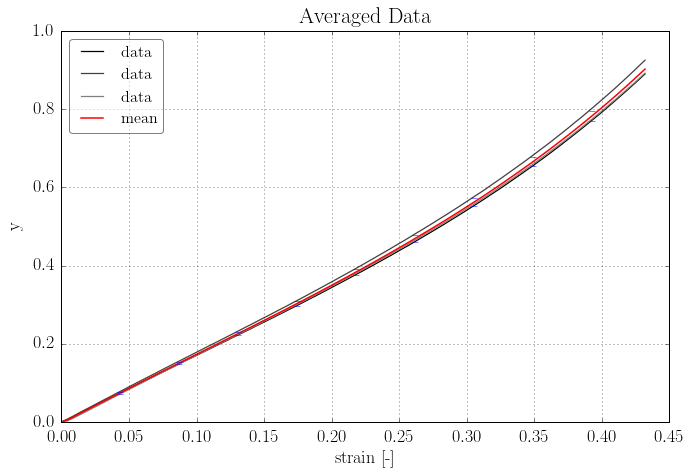

In [6]:
# POSSIBLE EDIT: ============ number of interpolation points
n_ip  = 100
h_err = int(n_ip/10)
# ==========================================================

# find minimum / maximum of column
x_minmax = np.min([np.max(datai[:, 0]) for datai in data])
x_minmin = np.min([np.min(datai[:, 0]) for datai in data])

# interpolation vector
x_ip  = np.linspace(x_minmin, x_minmax, n_ip)

# variable that stores all interpolated vectors
y_ips = list()

plt.figure(figsize=(10, 7))
plt.subplot(1, 1, 1)

# interpolate all data
for i, datai in enumerate(data):
    y_ip = np.interp(x_ip, datai[:, 0], datai[:, 1])
    y_ips.append(y_ip)
    plt.plot(x_ip, y_ip, lw=1.25, color=str(i/(N_files+1)), label='data')

# average data
y_ips = np.array(y_ips)
y_ave = y_ips.mean(axis=0)
y_std = y_ips.std(axis=0)

plt.plot(x_ip, y_ave, 'r', lw=1.5, label='mean')
plt.errorbar(x_ip[::h_err], y_ave[::h_err], yerr=y_std[::h_err], lw=0, ms=8)

plt.legend(loc='best', fontsize=16, fancybox=True, framealpha=0.5)
plt.title('Averaged Data', fontsize=22, y=1.01)
plt.xlabel('strain [-]', fontsize=18)
plt.ylabel('y', fontsize=18, labelpad=10)
plt.tick_params(labelsize=18, labelcolor='k')
plt.tick_params(axis='x', pad=7)
plt.tick_params(axis='y', pad=7)
plt.tight_layout()

#Save Average 

In [8]:
np.savetxt('/home/rhopf/Dropbox/b_zurich_heart/c_models/alex/data/M_UA_PDMS_470d_mean.dat', np.array([x_ip, y_ave, y_std]).T)

# Batch Process

Select entire series of measurement groups at a time and average (select mean or median type) them at once.

In [25]:
n_ip    = 100
average = np.mean
# average = np.median

for idx in range(6):
    paths   = glob.glob('/media/rhopf/phd_home/b_zurich_heart/a_experiments/analysis/M_UA_*t' + str(idx) + '*_*final_load*.dat')
    N_files = len(paths) 

    data = []
    for path in paths:

        # EDIT: unpacking format according to file !
        t, ex, ey, f, k, s = np.loadtxt(path).T

        # EDIT: append x and y for interpolation !
        # all y will be interpolated on span of x !
        data.append(np.array([ex, s]).T)
        
    # find minimum / maximum of column
    x_minmax = np.min([np.max(datai[:, 0]) for datai in data])
    x_minmin = np.min([np.min(datai[:, 0]) for datai in data])

    # interpolation vector
    x_ip  = np.linspace(x_minmin, x_minmax, n_ip)

    # variable that stores all interpolated vectors
    y_ips = list()

    # interpolate all data
    for i, datai in enumerate(data):
        y_ip = np.interp(x_ip, datai[:, 0], datai[:, 1])
        y_ips.append(y_ip)

    # average data
    y_ips = np.array(y_ips)
    y_ave = average(y_ips, axis=0)
    
    # save data
    np.savetxt('/media/rhopf/phd_home/b_zurich_heart/a_experiments/final/M_UA_PDMS_mean_time_' + str(idx) + '.dat', np.array([x_ip, y_ave]).T)

# Plot

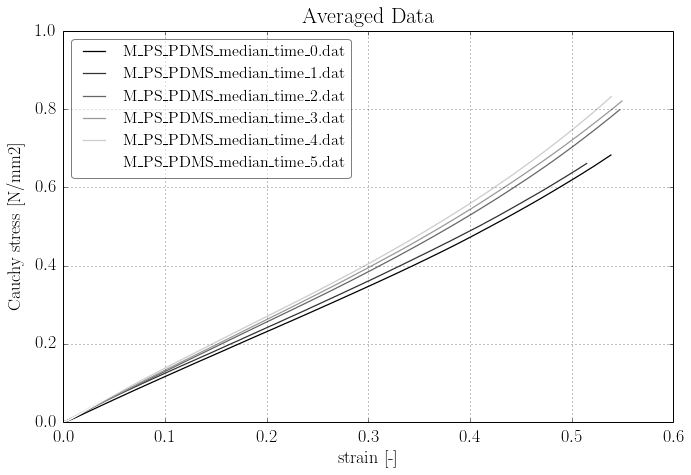

In [37]:
# init figure
plt.figure(figsize=(10, 7))
plt.subplot(1, 1, 1)

# loop over all files
for i, path in enumerate(glob.glob('/media/rhopf/phd_home/b_zurich_heart/a_experiments/final/M_PS_PDMS_median_time_*.dat')):
    x, y = np.loadtxt(path).T
    plt.plot(x, y, lw=1.25, color=str(i/(N_files+1)), label=os.path.basename(path).replace('_', '\_'))

plt.legend(loc='best', fontsize=16, fancybox=True, framealpha=0.5)
plt.title('Averaged Data', fontsize=22, y=1.01)
plt.xlabel('strain [-]', fontsize=18)
plt.ylabel('Cauchy stress [N/mm2]', fontsize=18, labelpad=10)
plt.tick_params(labelsize=18, labelcolor='k')
plt.tick_params(axis='x', pad=7)
plt.tick_params(axis='y', pad=7)
plt.tight_layout()